In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Input, Dense
from keras.optimizers import SGD,Adam

In [2]:
# 1. 데이터 읽기
file_path = 'C:/Users/yoojm/Gachon/2학년 1학기/인공지능개론_이명규/Dataset/abalone.data'
column_names = ["Sex","Length","Diameter","Height","Whole weight","Shucked weight","Viscera weight","Shell weight","Rings"]
df = pd.read_csv(file_path, header=None, names=column_names)
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [3]:
# 2. 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [4]:
# 3. 필요한 경우 Encoding
label=LabelEncoder()

columns_to_encode = ['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings']

for column in columns_to_encode:
    df[column] = label.fit_transform(df[column])

df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,66,56,18,715,417,199,263,14
1,2,45,36,17,285,178,94,113,6
2,0,81,67,26,962,480,280,374,8
3,2,63,56,24,718,400,225,273,9
4,1,41,34,15,253,159,76,87,6


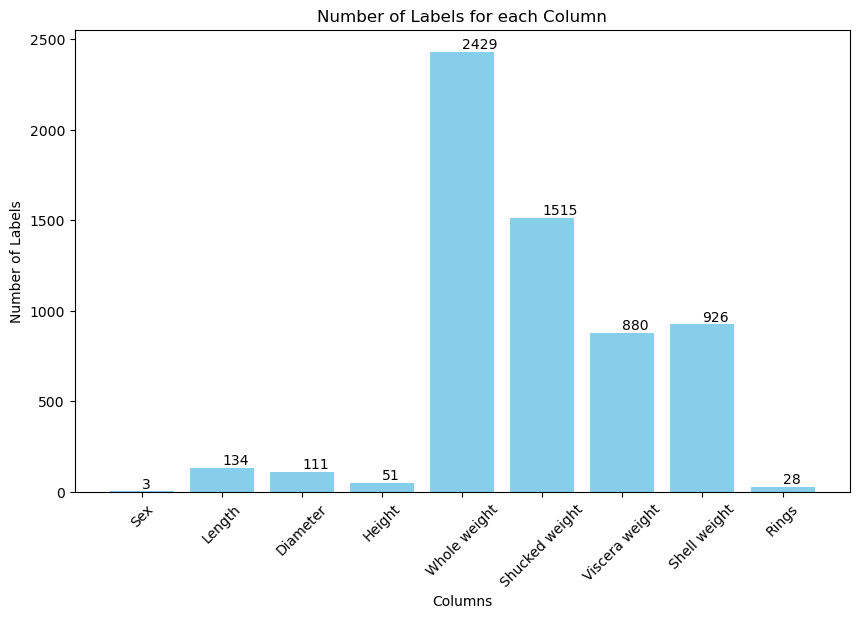

Diameter
73     139
78     120
63     111
83     110
77     100
      ... 
105      1
110      1
107      1
2        1
106      1
Name: count, Length: 111, dtype: int64

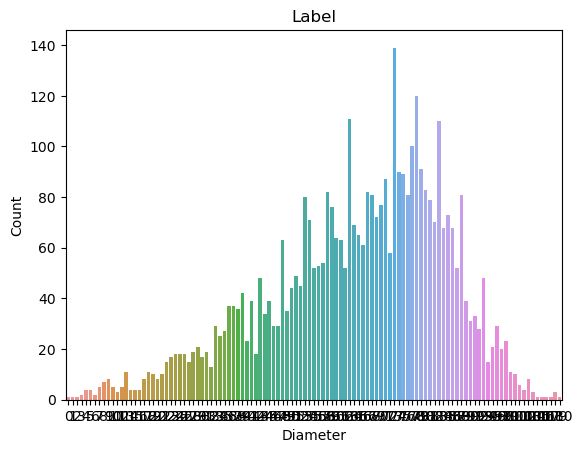

In [5]:
# 4. 클래스 갯수 확인 (그래프, 레이블 갯수)

## 컬럼명과 레이블 갯수를 저장할 딕셔너리 초기화
label_counts = {}

## 각 컬럼의 클래스 개수 확인
for column in columns_to_encode:
    label_counts[column] = len(df[column].unique())

## 그래프로 표현
plt.figure(figsize=(10, 6))
bars = plt.bar(label_counts.keys(), label_counts.values(), color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Labels')
plt.title('Number of Labels for each Column')
plt.xticks(rotation=45)

## 클래스 개수를 막대 위에 숫자로 표현
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom')
plt.show()

## 'Diameter' feature
### 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Diameter")
plt.ylabel("Count")
plt.title("Label")

### 레이블 갯수 확인 (숫자)
df['Diameter'].value_counts()

In [6]:
# 5. StandardScaler를 사용하여 데이터 정규화

## StandardScaler 객체 생성
scaler = StandardScaler()

# 데이터를 StandardScaler를 사용하여 정규화
scaled_data_standard = scaler.fit_transform(df.drop('Diameter', axis=1))  # Diameter 열 제외하고 정규화
scaled_df_standard = pd.DataFrame(scaled_data_standard, columns=df.columns[:-1])  # 데이터프레임으로 변환

scaled_df_standard

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,1.151980,-0.575145,-1.148060,-0.667362,-0.628486,-0.740559,-0.655462,1.572290
1,1.151980,-1.450298,-1.277806,-1.318850,-1.249942,-1.242074,-1.309583,-0.910328
2,-1.280690,0.049965,-0.110084,-0.293135,-0.464671,-0.353677,-0.171413,-0.289674
3,1.151980,-0.700167,-0.369578,-0.662817,-0.672690,-0.616375,-0.611854,0.020654
4,-0.064355,-1.616994,-1.537300,-1.367333,-1.299346,-1.328048,-1.422963,-0.910328
...,...,...,...,...,...,...,...,...
4172,-1.280690,0.341683,0.668397,0.202299,0.102180,0.577707,0.125122,0.330981
4173,1.151980,0.550053,-0.110084,0.387140,0.450611,0.343667,0.216699,0.020654
4174,1.151980,0.633401,1.706372,0.865908,0.871849,1.036234,0.596089,-0.289674
4175,-1.280690,0.841770,0.279156,0.688643,0.900452,0.783089,0.508872,0.020654


In [7]:
# 6. 데이터 분할
X = scaled_df_standard.values
y = df['Diameter'].values # 회귀의 경우 원-핫 인코딩을 할 필요가 없음
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3132, 8) (1045, 8) (3132,) (1045,)


In [8]:
# 7. 함수형 모델 사용

## 입력 레이어 정의
inputs = keras.Input(shape=(X_train.shape[1],))

## 은닉층 정의
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)

## 출력 레이어 정의
outputs = Dense(1, activation='linear')(x)

## Model 객체 생성
model = Model(inputs=inputs, outputs=outputs)

## 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])

## 모델 요약
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 8)]               0         
                                                                 
 dense (Dense)               (None, 64)                576       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [9]:
## 모델 학습
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/30
98/98 [==============================] - 1s 5ms/step - loss: 4035.8235 - mean_squared_error: 4035.8235 - val_loss: 2735.1968 - val_mean_squared_error: 2735.1968
Epoch 2/30
98/98 [==============================] - 0s 2ms/step - loss: 1393.5992 - mean_squared_error: 1393.5992 - val_loss: 892.3163 - val_mean_squared_error: 892.3163
Epoch 3/30
98/98 [==============================] - 0s 2ms/step - loss: 649.6025 - mean_squared_error: 649.6025 - val_loss: 489.8586 - val_mean_squared_error: 489.8586
Epoch 4/30
98/98 [==============================] - 0s 2ms/step - loss: 292.8949 - mean_squared_error: 292.8949 - val_loss: 172.7382 - val_mean_squared_error: 172.7382
Epoch 5/30
98/98 [==============================] - 0s 2ms/step - loss: 100.8137 - mean_squared_error: 100.8137 - val_loss: 61.8482 - val_mean_squared_error: 61.8482
Epoch 6/30
98/98 [==============================] - 0s 2ms/step - loss: 44.5419 - mean_squared_error: 44.5419 - val_loss: 35.5936 - val_mean_squared_error: 

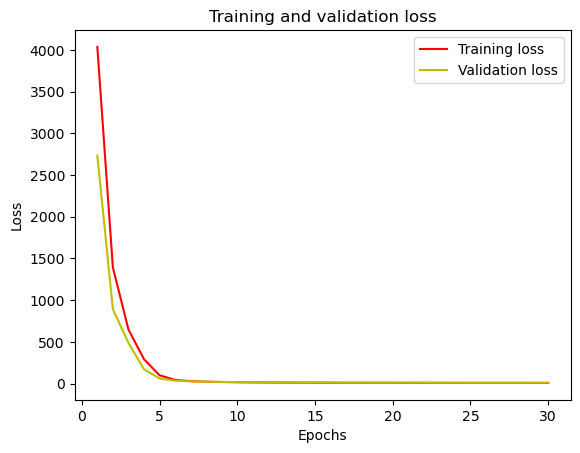

In [10]:
## 손실 그래프 출력
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
## 모델 평가
mse = model.evaluate(X_test, y_test)[1]
print("평균 제곱 오차:", mse)

33/33 [==============================] - 0s 1ms/step - loss: 10.7878 - mean_squared_error: 10.7878
평균 제곱 오차: 10.787840843200684
